<a href="https://colab.research.google.com/github/JisungPark0319/education/blob/main/lab_ml/ml05_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [129]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Normal Equation

In [130]:
X = np.arange(0, 3).reshape((3,1))
y = 4 + 3 * X + np.random.randn(3,1)

X.shape, y.shape

((3, 1), (3, 1))

In [131]:
print(X)
print(y)

[[0]
 [1]
 [2]]
[[ 3.40598058]
 [ 7.98821644]
 [10.18310407]]


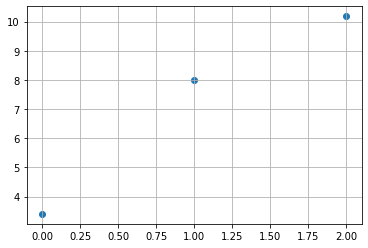

In [132]:
plt.scatter(X, y)
plt.grid()

In [133]:
X_b = np.c_[np.ones(shape=(3,1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [134]:
# MSE를 최소화하는 [b0, b1]을 찾는 게 선형회귀의 목적.
# [b0, b1]을 찾는 방법 1: 정규 방정식(normal equation)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best #> [[y절편], [기울기]]

array([[3.80387195],
       [3.38856174]])

In [135]:
y_pred = X_b @ theta_best
y_pred

array([[ 3.80387195],
       [ 7.1924337 ],
       [10.58099544]])

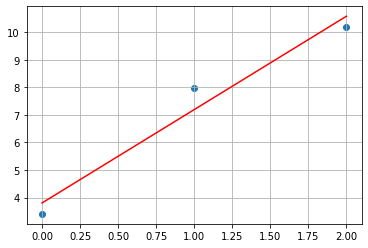

In [136]:
plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.grid()
plt.show()

In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
lin_reg = LinearRegression()
lin_reg.fit(X, y) # fit: 선형 회귀 방정식의 절편(intercept)과 기울기(coefficient)들을 찾는 과정.
lin_reg.intercept_, lin_reg.coef_

(array([3.80387195]), array([[3.38856174]]))

# Gradient Descent(경사 하강법)


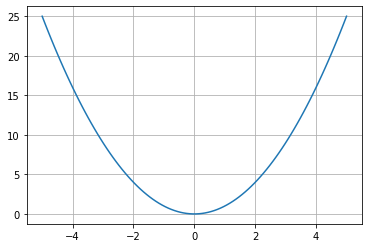

In [139]:
X = np.linspace(start=-5, stop=5, num=100)
y = X ** 2

plt.plot(X, y)
plt.grid()

# 기울기

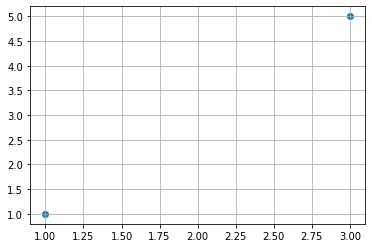

In [140]:
# 기울기: (y의 증가분) / (x의 증가분)
pt1 = [1, 1]
pt2 = [3, 5]

plt.scatter([pt1[0], pt2[0]], [pt1[1], pt2[1]])
plt.grid()

In [141]:
delta_y = pt2[1] - pt1[1] # y 증가(감소)분
delta_x = pt2[0] - pt1[0] # x 증가(감소)분
slope = delta_y / delta_x
slope

2.0

In [142]:
def gradient(fn, x, h=0.001):
  return ( (fn(x + h) - fn(x)) / h )

In [143]:
def square(x):
  return x**2

In [144]:
# y = x**2 그래프에서 x=4에서의 접선의 기울기(gradient)
gradient(fn=square, x=4)

8.0010000000037

In [145]:
gradient(fn=square, x=-2)

-3.9989999999994197

In [146]:
gradient(fn=square, x=2)

4.000999999999699

## 경사 하강법
1. 임의의 점(x_init)을 선택
2. 그 점에서의 gradient(기울기)를 계산
3. 선택한 임의의 점을 이동: x_new = x_init - eta * gradient
4. 2 ~ 3의 과정을 반복.
* eta: 양수(eta > 0). 학습률(learning rate). eta가 크면 최솟값으로 빨리 수렴, 작으면 느리게 수렴.


In [147]:
def plot_function(fn):
  X = np.linspace(start=-5, stop=5, num=100)
  y = fn(X)
  plt.plot(X, y, '-')

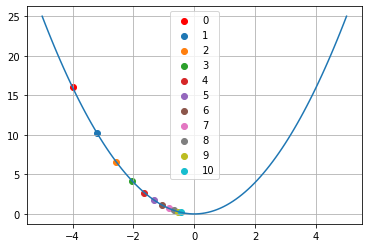

In [148]:
def plot_gradient_descent(fn, x_init, niterations=5, eta=0.1):
  plot_function(fn)

  y_init = fn(x_init)
  plt.scatter(x_init, y_init, label='0', color='red')

  for epoch in range(niterations):
    x_new = x_init - eta*gradient(fn, x_init)
    y_new = fn(x_new)
    plt.scatter(x_new, y_new, label=(epoch+1))
    x_init = x_new
  plt.grid()
  plt.legend()

plot_gradient_descent(square, -4, 10)

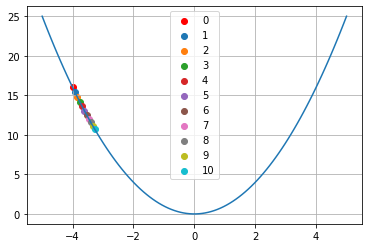

In [149]:
plot_gradient_descent(square, -4, 10, 0.01)

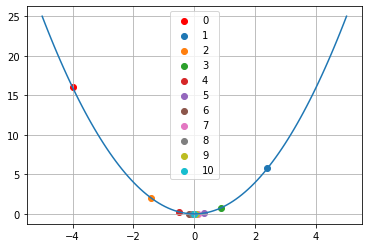

In [150]:
plot_gradient_descent(square, -4, 10, 0.8)

# 경사하강법을 사용한 선형회귀 방정식의 절편, 기울기 찾기: y = b0 + b1 * x
* 선형 회귀 방정식 'y = b0 + b1 * x'
* 절편(intercept, bias 편향): 'b0'
* 기울기(coefficient): 'b1'

In [151]:
np.random.seed(1)
X = np.arange(0, 3).reshape((3,1))
y =  4 + 3 * X + np.random.randn(3, 1)

In [152]:
X

array([[0],
       [1],
       [2]])

In [153]:
y

array([[5.62434536],
       [6.38824359],
       [9.47182825]])

In [154]:
X_b = np.c_[np.ones(shape=(3,1)), X]
X_b

array([[1., 0.],
       [1., 1.],
       [1., 2.]])

In [155]:
X_b.T

array([[1., 1., 1.],
       [0., 1., 2.]])

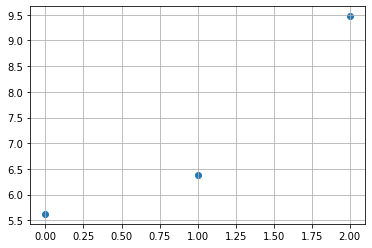

In [156]:
plt.scatter(X, y)
plt.grid()

[[0.417022  ]
 [0.72032449]]
[[3.76988582]
 [2.97460784]]


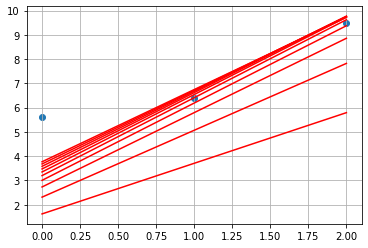

In [157]:
eta = 0.1 # 학습률(learnig rate)
m = 3 # 샘플 개수
n_iterations = 10 # 반복 횟수
np.random.seed(1)
theta = np.random.rand(2, 1) # [[b0], [b1]] 초깃값 - 난수 사용
print(theta)
plt.scatter(X, y)
for epoch in range(n_iterations):
  gradient = (2/m) * X_b.T @ (X_b @ theta - y)
  theta = theta - eta * gradient
  y_pred = X_b @ theta
  plt.plot(X, y_pred, 'r-')

plt.grid()
print(theta)

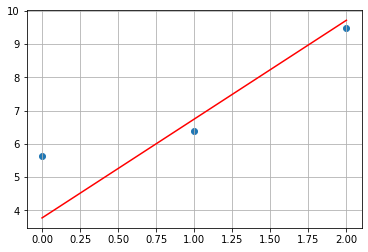

In [158]:
y_pred = X_b @ theta

plt.scatter(X, y)
plt.plot(X, y_pred, 'r-')
plt.grid()

In [159]:
from sklearn.linear_model import SGDRegressor
sgd_reg =SGDRegressor(eta0=0.1)
sgd_reg.fit(X, y)
# fit: MSE를 최소화하는 절편 b0와 계수 b1을 찾음.

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [160]:
sgd_reg.intercept_, sgd_reg.coef_
# y = inter + coef * x

(array([4.97269462]), array([2.12148333]))

## 확률적 경사 하강법(Stochastic Gradient Descent)

In [161]:
np.random.seed(1)

m = 100 # 샘플 개수
X = 2 * np.random.rand(m, 1) # (m, 1) shape의 2d array
y = 4 + 3 * X + np.random.randn(m, 1)

X.shape, y.shape

((100, 1), (100, 1))

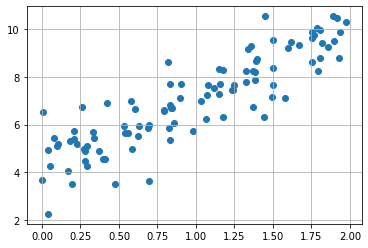

In [162]:
plt.scatter(X, y)
plt.grid()

In [163]:
X_b = np.c_[np.ones(shape=(m,1)), X] # bias가 추가된 샘플 행렬
theta = np.random.randn(2, 1) # 선형 회귀 방정식의 계수들 초깃값 - 난수 사용.
print(theta)

eta = 0.01
n_iterations = 1000 # 전체 반복 횟수(모든 샘플에서 gradient가 갱신되는 횟수)
for epoch in range(n_iterations):
  for i in range(m): # 샘플 개수 만큼 반복
    random_index = np.random.randint(m)  # 0 ~ m사이의 정수 중 난수 선택.
    xi = X_b[random_index:random_index + 1] # [[1, x]]: gradient를 계산할 샘플 1개
    yi = y[random_index:random_index + 1] # [[y]]: random_index에 있는 레이블
    gradient = 2 * xi.T @ (xi @ theta - yi) # gradient 계산
    theta = theta - eta*gradient # theta 업데이트


print(theta)

[[ 0.04366899]
 [-0.22631424]]
[[4.20049521]
 [2.81793093]]


In [164]:
X_new = np.array([[1, 0], 
                  [1, 2]])
y_pred = X_new @ theta
y_pred

array([[4.20049521],
       [9.83635707]])

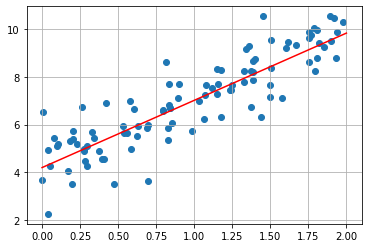

In [165]:
plt.scatter(X, y)

plt.plot([[0], [2]], y_pred, 'r-')

plt.grid()

In [166]:
sgd_reg = SGDRegressor(eta0=0.01, max_iter=50)
sgd_reg.fit(X, y)
sgd_reg.intercept_, sgd_reg.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([3.91003173]), array([3.12206045]))

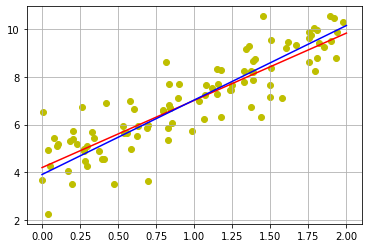

In [167]:
y_pred2 = sgd_reg.predict([[0], [2]])

plt.scatter(X, y, color='y')
plt.plot([[0], [2]], y_pred, 'r-')
plt.plot([[0], [2]], y_pred2, 'b-')
plt.grid()

In [168]:
# GD를 테스트하기 위한 가상의 데이터
np.random.seed(1)

m = 100 # 샘플 개수
X = 2 * np.random.rand(m, 1) # (m, 1) shape의 2d array
y = 4 + 3 * X + np.random.randn(m, 1)

X.shape, y.shape

((100, 1), (100, 1))

In [169]:
# 함수 정의: batch, stochastic, mini-batch GD
# y = b0 + b1 * x1 + b2 * x2 + b3 * x3 + ...
# 선형회귀 방정식으로 예측한 값들의 MSE가 최소가 되는 (b0, b1, b2, b3, ...)을 찾는 게 목적.
def gradient_descent(X, y,
                     max_iterations=1_000,
                     minibatch_size=20,
                     eta0=0.1,
                     random_state=1):
  """X: sample data, y: label,
  max_iterations: epoch number
  minibatch_size: minibatch_size=1: stochastic GD, minibatch_size=sample number: batch GD
  eta0: learning rate initial value
  """
  np.random.seed(random_state) # random seed set-up

  m, n = X.shape # m: number of sample, n: number of sample features
  X_b = np.c_[np.ones((m, 1)), X] # Combine col vector with all values of 1
  theta_paths =[]
  theta = np.random.randn(n+1, 1) # random init
  theta_paths.append(theta) # To ensure that theta are converging, save the intermediate process.

  for epoch in range(max_iterations):
    # random shuffle of training set
    shuffled_indices = np.random.permutation(m) # random shuffle of integers between 0 and m
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size): # m: number of sample -> repeated of the size of the minibatch 
      # minibatch sample/label select
      xi = X_b_shuffled[i:(i+minibatch_size)]
      yi = y_shuffled[i:(i+minibatch_size)]
      # calculae gradient in a minibatch
      gradient = (2/minibatch_size) * xi.T @ (xi @ theta - yi)
      # upgrade theta to calculate gradient(renewal)
      theta = theta - eta0 * gradient
      # store renewal theta
      theta_paths.append(theta)

  return np.array(theta_paths)

In [170]:
# batch GD
thetas_batch = gradient_descent(X, y, minibatch_size=m) # m=100
# theta 최적값
thetas_batch[-1]

array([[4.23695725],
       [2.84246254]])

In [171]:
# stochastic GD
thetas_stochastic = gradient_descent(X, y, minibatch_size=1)
thetas_stochastic[-1]

array([[4.37511229],
       [2.93391621]])

In [172]:
# mini-batch GD
thetas_minibatch = gradient_descent(X, y, minibatch_size = 20)
thetas_minibatch[-1]

array([[4.22266408],
       [2.82749625]])

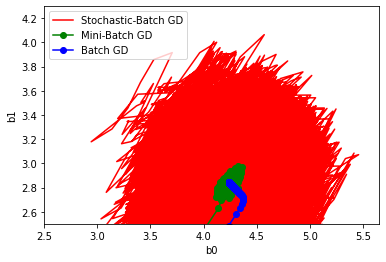

In [173]:
plt.plot(thetas_stochastic[:,0], thetas_stochastic[:,1], 'r-', label='Stochastic-Batch GD')
plt.plot(thetas_minibatch[:,0], thetas_minibatch[:,1], 'go-', label='Mini-Batch GD')
plt.plot(thetas_batch[:,0], thetas_batch[:,1], 'bo-', label='Batch GD')
plt.legend()
plt.xlabel('b0')
plt.ylabel('b1')
plt.axis(xmin=2.5, ymin=2.5)
plt.show()

다항 회귀(Polynomial Regression)

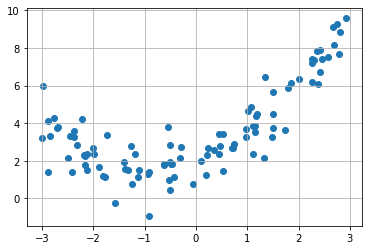

In [174]:
np.random.seed(1)

m = 100
X= 6 * np.random.rand(m, 1) - 3 # -3 <= X < 3
y = 0.5 * X**2 +  X + 2 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.grid()

In [175]:
# 2차항 특성(feature)를 추가
X_poly = np.c_[X, X**2]
X_poly[:5]

array([[-0.49786797,  0.24787252],
       [ 1.32194696,  1.74754377],
       [-2.99931375,  8.99588298],
       [-1.18600456,  1.40660683],
       [-2.11946466,  4.49213042]])

In [176]:
# scikit-learn을 사용한 2차항 특성 추가
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X_poly[:5]

array([[-0.49786797,  0.24787252],
       [ 1.32194696,  1.74754377],
       [-2.99931375,  8.99588298],
       [-1.18600456,  1.40660683],
       [-2.11946466,  4.49213042]])

In [177]:
# SGD
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor() # model create
sgd_reg.fit(X_poly, y.ravel()) # model fitting: 선형 회귀 모델의 계수들(b0, b1, b2)을 찾음.
# y = b0 + b1 * x + b2 * x**2
sgd_reg.intercept_, sgd_reg.coef_

(array([1.87785006]), array([0.95515989, 0.55979806]))

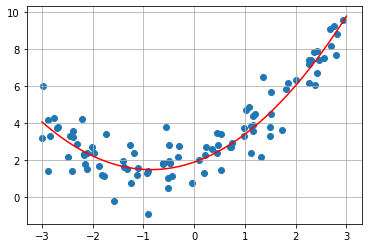

In [178]:
X_new = np.linspace(-3, 3, num=100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = sgd_reg.predict(X_new_poly)

plt.scatter(X, y)
plt.plot(X_new, y_new, 'r-')
plt.grid()

In [196]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

(-3.3, 3.3, 0.0, 10.0)

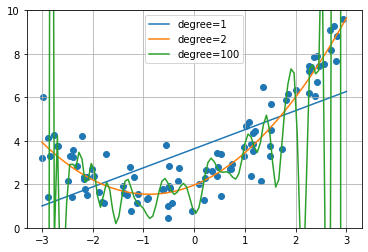

In [197]:
# 선형 회귀, 2차 다항 회귀, 100차 다항 회귀 결과 비교
plt.scatter(X, y)

for degree in [1, 2, 100]: # degree=1: 선형 회귀.
  # 1) 다차항 파생 변수 추가
  poly_features = PolynomialFeatures(degree, include_bias=False)
  # 2) 파생 변수들을 포함한 모든 특성들을 같은 스케일로 변환
  std_scaler = StandardScaler() # 다항 회귀에서 차수가 커질 수록 특성 스케일링을 하는 게 좋음.
  # 3) 선형 회귀 또는 SGD 학습
  sgd_reg = LinearRegression()
  pipe = Pipeline(steps=[
                         ('poly_feature', poly_features),
                         ('scaler', std_scaler),
                         ('model', sgd_reg)
  ])
  # 모델 훈련
  pipe.fit(X, y)
  # 훈련된 모델로 테스트 셋을 예측
  y_new = pipe.predict(X_new)
  plt.plot(X_new, y_new, label=f'degree={degree}')

plt.legend()
plt.grid()
plt.axis(ymin=0, ymax = 10)

# 훈련 셋(X)의 많은 점들은 100차 다항 회귀 곡선위에 놓여 있음.
# -> 100차 다항 회귀 곡선은 훈련 셋을 잘 설명함.
# -> 훈련되지 않은 테스트 셋(X_new)의 예측값은 오차가 매우 클 수 있음.
# -> Overfitting(과적합, 과대적합)

규제(Regulariztion), 페널티(Penalty):
* 모델을 훈련시킬 때, 비용 함수(cost function)/손실 함수(loss function)에 항을 추가하여 일부러 에러를 키우는 방법.
* 훈련 셋에 대해서는 에러가 커지기 때문에 과적합(overfitting)을 줄일 수 있음.
* Ridge 규제(l2 규제): `비용함수 = MSE + alpha * l2-norm`
* l2 페널티의 크기가 커지면 모든 계수들(b1, b2, ...)을 0에 가깝게 만드는 효과가 있음.
* Lasso 규제(l1 규제): `비용함수 = MSE + alpha * l1-norm`
* l1 페널티의 크기가 커지면 중요하지 않은 계수들만 0에 가깝게 만드는 효과가 있음.
* Elastic Net: `Ridge(l2) + Lasso(l1)`

In [199]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression, SGDRegressor

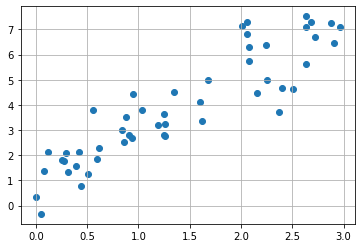

In [200]:
np.random.seed(1)
m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 2 * X + np.random.randn(m, 1)

plt.scatter(X, y)
plt.grid()

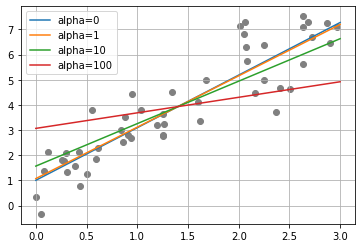

In [202]:
X_new = np.linspace(0, 3, 100).reshape((100, 1)) # 테스트 셋

# Ridge(l2) 규제를 적용한 선형 회귀: alpha(0, 1, 10, 100)
for alpha in [0, 1, 10, 100]:
  model = Ridge(alpha)
  model.fit(X, y) # 훈련 셋으로 모델 훈련(y = b0 + b1 * x)
  y_new = model.predict(X_new) # 훈련된 모델을 사용해서 테스트 셋의 예측값을 찾음.
  plt.plot(X_new, y_new, label=f'alpha={alpha}')

plt.scatter(X, y, color='gray')
plt.legend()
plt.grid()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.91387036156907, tolerance: 0.02242278468446272
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.183063936194333, tolerance: 0.02242278468446272
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06365371267323638, tolerance: 0.02242278468446272
  positive)


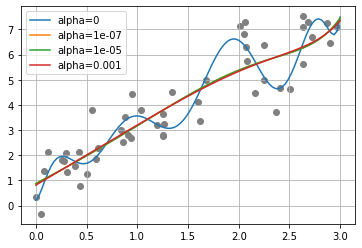

In [204]:
# Lasso(l1 penalty) 규제를 사용한 선형 회귀
for alpha in [0, 1e-7, 1e-5, 1e-3]:
  poly_feature = PolynomialFeatures(degree=10)
  std_scaler = StandardScaler()
  if alpha == 0:  # document에서 alpha == 0인 경우는 Lasso 대신 L.R.을 사용하라고 되어 있음.
    model = LinearRegression()
  else:
    model = Lasso(alpha)
  pipe = Pipeline(steps=[
                         ('poly', poly_feature),
                         ('scaler', std_scaler),
                         ('model', model)
  ])
  pipe.fit(X, y) # 모델 훈련

  y_new = pipe.predict(X_new)
  plt.plot(X_new, y_new, label=f'alpha={alpha}')

plt.scatter(X, y, color='gray')
plt.legend()
plt.grid()